# PROFESSIONAL CERTIFICATE IN DATA SCIENCE AND ANALYTICS
# Linear Regression: Part Two

This code snippet imports several essential Python libraries and modules commonly used for data analysis, statistical modeling, machine learning, and visualization. Additionally, it configures NumPy to suppress specific runtime warnings. Here's a breakdown of the imports and their purposes:

### Library Imports:

1. **`numpy` (`import numpy as np`)**:
   - NumPy is a fundamental library for numerical computing in Python. It provides support for multi-dimensional arrays and a wide range of mathematical operations. The alias `np` is a standard convention for referencing NumPy functions. In this context, NumPy is likely used for handling numerical data, performing matrix operations, and implementing mathematical computations.

2. **`pandas` (`import pandas as pd`)**:
   - Pandas is a library designed for data manipulation and analysis. It introduces data structures like `DataFrame` and `Series`, which make it easy to handle structured data. The alias `pd` is a standard convention for referencing Pandas functions. It is commonly used for organizing, cleaning, and preprocessing datasets.

3. **`matplotlib.pyplot` (`from matplotlib import pyplot as plt`)**:
   - Matplotlib is a popular library for creating visualizations. The `pyplot` module provides a MATLAB-like interface for generating plots. The alias `plt` is a standard convention for referencing `pyplot`. It is typically used to create scatter plots, line graphs, histograms, and other visualizations.

4. **`statsmodels.formula.api` (`import statsmodels.formula.api as smf`)**:
   - Statsmodels is a library for statistical modeling and hypothesis testing. The `formula.api` module provides a high-level interface for specifying models using formulas (e.g., `y ~ x1 + x2`). It is particularly useful for performing linear regression and obtaining detailed model summaries, including coefficients, p-values, and R² values.

5. **`sklearn.linear_model.LinearRegression`**:
   - This module from Scikit-learn provides tools for building linear regression models. The `LinearRegression` class implements Ordinary Least Squares (OLS) regression, allowing you to fit models, make predictions, and access model parameters like coefficients and intercepts.

6. **`sklearn.feature_selection.RFE`**:
   - Recursive Feature Elimination (RFE) is a feature selection technique provided by Scikit-learn. It iteratively removes the least important features based on a model's performance, helping to identify the most relevant predictors for a given task.

7. **`sklearn.preprocessing.StandardScaler`**:
   - The `StandardScaler` class is used to standardize features by removing the mean and scaling to unit variance. This preprocessing step is essential for many machine learning algorithms that are sensitive to the scale of input features.

8. **`sklearn.decomposition.PCA`**:
   - Principal Component Analysis (PCA) is a dimensionality reduction technique provided by Scikit-learn. It transforms the data into a lower-dimensional space while retaining as much variance as possible, which is useful for reducing complexity and improving computational efficiency.

### NumPy Error Handling:

- **`np.seterr(divide='ignore', invalid='ignore')`**:
  - Configures NumPy to suppress warnings related to division by zero and invalid operations (e.g., `NaN` results). This is useful when working with datasets that may contain edge cases or missing values.

- **`np.seterr(over='ignore', invalid='ignore')`**:
  - Suppresses warnings related to overflow errors and invalid operations. This ensures that runtime warnings do not interrupt the execution of the code, especially when performing large-scale numerical computations.

### Purpose:
This setup prepares the environment for performing data analysis, statistical modeling, and machine learning tasks. The imported libraries provide tools for handling data, building models, selecting features, scaling inputs, and visualizing results. The NumPy error handling ensures that the code runs smoothly even when encountering numerical edge cases.

In [1]:
import numpy                                   as np      # type: ignore
import pandas                                  as pd      # type: ignore
from   matplotlib                import pyplot as plt     # type: ignore
import statsmodels.formula.api                 as smf     # type: ignore
from   sklearn.linear_model      import LinearRegression  # type: ignore
from   sklearn.feature_selection import RFE               # type: ignore
from   sklearn.preprocessing     import StandardScaler    # type: ignore
from   sklearn.decomposition     import PCA               # type: ignore

np.seterr(divide='ignore', invalid='ignore',over='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

## Feature selection
This code snippet reads a CSV file named `mtcars.csv` located in the `data` directory and loads its contents into a Pandas DataFrame named `cars`. The `pd.read_csv` function is a versatile method provided by the Pandas library for reading comma-separated values (CSV) files and converting them into a structured DataFrame format.

### Step-by-Step Explanation:

1. **Reading the CSV File**:
   - `pd.read_csv('data/mtcars.csv')`:
     - The `read_csv` function takes the file path `'data/mtcars.csv'` as an argument and reads the contents of the file.
     - By default, it assumes the file is in CSV format, with the first row containing column headers and subsequent rows containing data.
     - The function automatically parses the data into rows and columns, creating a tabular structure.

2. **Storing the Data**:
   - The resulting DataFrame is assigned to the variable `cars`. A DataFrame is a two-dimensional, labeled data structure in Pandas, similar to a table in a relational database or a spreadsheet.

3. **Displaying the Data**:
   - The `cars` variable is referenced at the end of the code snippet. In a Jupyter Notebook or similar interactive environment, this will display the contents of the DataFrame. The output will show the column names and the first few rows of data, allowing you to inspect the structure and contents of the dataset.

### Purpose:
This code is typically used as the first step in a data analysis workflow. By loading the `mtcars.csv` file into a DataFrame, the data becomes accessible for further processing, such as cleaning, visualization, or statistical modeling. The `mtcars` dataset is a well-known dataset in the R programming community, often used for demonstrating regression analysis and other statistical techniques.

In [2]:
cars = pd.read_csv('data/mtcars.csv')
cars

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


This code snippet performs a multiple linear regression analysis using the `statsmodels` library. It dynamically constructs a regression formula based on the columns of the `cars` DataFrame and fits an Ordinary Least Squares (OLS) model to predict the `mpg` (miles per gallon) variable.

### Step-by-Step Explanation:

1. **Constructing the Formula**:
   - `cars.columns.drop(['model', 'mpg'])`:
     - This retrieves all column names from the `cars` DataFrame, excluding the `model` and `mpg` columns. The `drop` method removes these specified columns from the list of column names.
     - The `model` column is likely excluded because it contains non-numeric or categorical data (e.g., car names), which cannot be directly used in regression. The `mpg` column is excluded because it is the dependent variable (target) being predicted.

   - `'+'.join(...)`:
     - The remaining column names are joined into a single string, separated by the `+` symbol. This creates the right-hand side of the regression formula, where each column is treated as an independent variable (predictor).
     - For example, if the remaining columns are `wt`, `hp`, and `qsec`, the resulting string would be `'wt+hp+qsec'`.

   - `'mpg ~' + all_cols`:
     - The formula string is constructed by concatenating `'mpg ~'` (indicating that `mpg` is the dependent variable) with the string of independent variables (`all_cols`). The final formula might look like `'mpg ~ wt+hp+qsec'`.

2. **Fitting the OLS Model**:
   - `smf.ols('mpg ~' + all_cols, data=cars)`:
     - The `ols` function from `statsmodels.formula.api` is used to define an Ordinary Least Squares (OLS) regression model. The formula specifies the relationship between the dependent variable (`mpg`) and the independent variables (all other columns except `model` and `mpg`).
     - The `data=cars` argument specifies that the variables in the formula are columns in the `cars` DataFrame.

   - `.fit()`:
     - The `fit` method solves the regression equation by estimating the coefficients for each independent variable. It uses numerical techniques (e.g., the Moore-Penrose pseudoinverse or QR decomposition) to minimize the residual sum of squares between the observed and predicted values of `mpg`.

3. **Displaying the Summary**:
   - `.summary()`:
     - This generates a detailed summary of the fitted regression model. The summary includes:
       - **Coefficients**: The estimated values for each independent variable, indicating their contribution to predicting `mpg`.
       - **P-values**: Statistical significance of each coefficient, showing whether the variable has a meaningful relationship with `mpg`.
       - **R-squared**: A measure of how well the independent variables explain the variability in `mpg`.
       - **F-statistic**: A test for the overall significance of the model.
       - **Residual Statistics**: Information about the distribution of the model's errors.

### Purpose:
This code automates the process of constructing a regression formula and fitting a model to predict `mpg` based on all relevant predictors in the dataset. By dynamically generating the formula, it ensures flexibility and scalability, especially when working with datasets that have many columns. The resulting summary provides insights into the relationships between the predictors and the target variable, helping to evaluate the model's performance and identify significant predictors.

In [3]:
all_cols = '+'.join(cars.columns.drop(['model', 'mpg']))
smf.ols('mpg ~' + all_cols, data=cars).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Mon, 12 May 2025   Prob (F-statistic):           3.79e-07
Time:                        19:34:22   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3034     18.718      0.657      0.518     -26.623      51.229
cyl           -0.1114      1.045     -0.107      0.916      -2.285       2.062
disp           0.0133      0.018      0.747      0.463      -0.024       0.050
hp            -0.0215      0.022     -0.987      0.335      -0.067       0.024
drat           0.7871      1.635      0.481      0.635      -2.614       4.188
wt            -3.7153      1.894     -1.961      0.063      -7.655       0.224
qsec           0.8210      0.731      1.123      0.274      -0.699       2.341
vs             0.3178      2.105      0.151      0.881      -4.059       4.694
am             2.5202      2.057      1.225      0.234      -1.757       6.797
gear           0.6554      1.493      0.439      0.665      -2.450       3.761
carb          -0.1994      0.829     -0.241      0.812      -1.923       1.524
==============================================================================
Omnibus:                        1.907   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.747
Skew:                           0.521   Prob(JB):                        0.418
Kurtosis:                       2.526   Cond. No.                     1.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Recursive Feature Elimination (RFE)** will first fit a model with all available variables and then look at the resulting coefficients. It will discard the variable with the smallest absolute coefficient (the one most close to 0) and then will fit a new model on the remaining variables. This process will be repeated until only a pre-specified number of variables remains.

This is more robust than just selecting the variables with the best coefficients, since the values of the coefficients can be affected in case some variables are correlated. Removing variables one by one decreases the chances of discarding meaningful variables or keeping uninformative ones.

This code snippet demonstrates the use of Recursive Feature Elimination (RFE) with a linear regression model to select the most important features for predicting the target variable `mpg` (miles per gallon) from the `cars` dataset.

### Step-by-Step Explanation:

1. **Defining the Features (`X`) and Target (`y`)**:
   - `X = cars.iloc[:, 2:]`:
     - This selects all columns of the `cars` DataFrame starting from the third column onward (index 2) as the feature set. These columns represent the independent variables (predictors) used to predict the target variable.
   - `y = cars['mpg']`:
     - This selects the `mpg` column from the `cars` DataFrame as the target variable. The goal is to predict `mpg` using the selected features.

2. **Initializing the Linear Regression Model**:
   - `lr = LinearRegression()`:
     - An instance of the `LinearRegression` class from Scikit-learn is created. This model will be used as the base estimator for RFE. Linear regression fits a linear model to the data by minimizing the residual sum of squares between the observed and predicted values.

3. **Applying Recursive Feature Elimination (RFE)**:
   - `RFE(lr, n_features_to_select=3)`:
     - RFE is initialized with the linear regression model (`lr`) as the base estimator and the number of features to select (`n_features_to_select=3`). RFE works by recursively removing the least important features based on the model's coefficients until the specified number of features remains.
     - The importance of each feature is determined by the magnitude of its coefficient in the linear regression model. Features with smaller absolute coefficients are considered less important and are removed first.

4. **Fitting the RFE Model**:
   - `.fit(X, y)`:
     - The RFE model is fitted to the feature set `X` and the target variable `y`. During this process:
       - The linear regression model is trained on the current set of features.
       - The least important features are identified and removed.
       - This process is repeated until only the top 3 features remain.

### Purpose:
This code is used to identify the three most important features in the dataset for predicting `mpg`. By reducing the number of features, RFE helps simplify the model, improve interpretability, and potentially enhance performance by removing irrelevant or redundant predictors. The selected features can then be used for further analysis or model building.

In [4]:
X   = cars.iloc[:, 2:]
y   = cars['mpg']
lr  = LinearRegression()
rfe = RFE(lr, n_features_to_select=3).fit(X, y)

This code snippet outputs the results of the Recursive Feature Elimination (RFE) process, which was applied earlier to select the most important features for predicting the target variable `mpg` (miles per gallon). The `print` statements display two key attributes of the fitted RFE model: `support_` and `ranking_`.

### Explanation of Outputs:

1. **`rfe.support_`**:
   - The `support_` attribute is a Boolean array where each element corresponds to a feature in the dataset. A value of `True` indicates that the feature was selected as one of the most important features by the RFE process, while `False` indicates that the feature was not selected.
   - For example, if there are 10 features in the dataset and the RFE process was configured to select 3 features, the `support_` array will contain exactly three `True` values, corresponding to the selected features.

2. **`rfe.ranking_`**:
   - The `ranking_` attribute is an array of integers where each element corresponds to a feature in the dataset. The ranking indicates the relative importance of each feature, with a rank of `1` assigned to the selected features (the most important ones). Higher numbers indicate less important features, with the least important feature receiving the highest rank.
   - For example, if there are 10 features and 3 were selected, the selected features will have a rank of `1`, while the remaining features will have ranks greater than `1`.

### Purpose:
These outputs provide insight into the feature selection process performed by RFE. The `support_` array identifies which features were chosen, while the `ranking_` array provides a complete ranking of all features based on their importance. This information is useful for understanding the decisions made by the RFE algorithm and for interpreting the results of the feature selection process.

In [5]:
print('Support :', rfe.support_)
print('Ranking :', rfe.ranking_)

Support : [False False False False  True  True False  True False False]
Ranking : [6 8 7 2 1 1 5 1 4 3]


This code snippet identifies and orders the feature names in the `cars` dataset based on their importance as determined by the Recursive Feature Elimination (RFE) process. Here's a detailed explanation:

### Step-by-Step Explanation:

1. **Selecting Feature Columns**:
   - `cars.columns[2:]`:
     - This retrieves the column names of the `cars` DataFrame starting from the third column onward (index 2). These columns represent the independent variables (features) used in the RFE process.

2. **Accessing RFE Rankings**:
   - `rfe.ranking_`:
     - The `ranking_` attribute of the fitted RFE object contains the ranking of each feature. Features with a rank of `1` are the most important (selected by RFE), while higher ranks indicate less important features.

3. **Adjusting Rankings**:
   - `rfe.ranking_ - 1`:
     - This subtracts `1` from each rank, effectively converting the most important features (rank `1`) to `0`. This adjustment is useful for sorting purposes, as lower values indicate higher importance.

4. **Sorting Feature Indices**:
   - `np.argsort(rfe.ranking_ - 1)`:
     - The `np.argsort` function returns the indices that would sort the adjusted rankings in ascending order. This means the most important features (with the lowest adjusted rank) will appear first in the sorted order.

5. **Mapping Indices to Feature Names**:
   - `cars.columns[2:][...]`:
     - The sorted indices are used to reorder the feature names from `cars.columns[2:]`. This results in a list of feature names sorted by their importance, with the most important features appearing first.

### Purpose:
This code provides a clear, ordered list of feature names based on their importance as determined by RFE. It is particularly useful for interpreting the results of the feature selection process, as it highlights which features contribute the most to the predictive model. This ordered list can guide further analysis or model refinement by focusing on the most relevant predictors.

In [6]:
print(cars.columns[2:][np.argsort(rfe.ranking_ - 1)])

Index(['wt', 'qsec', 'am', 'drat', 'carb', 'gear', 'vs', 'cyl', 'hp', 'disp'], dtype='object')


This code snippet fits a linear regression model using only the features selected by Recursive Feature Elimination (RFE) and then prints key metrics of the resulting model.

First, `X = rfe.fit_transform(X, y)` applies the RFE process to the feature matrix `X` and target vector `y`. This step both fits the RFE selector and transforms `X` to retain only the most important features (as determined by RFE). The resulting `X` now contains only the subset of features chosen as most predictive for `mpg`.

Next, `y = cars['mpg']` ensures that the target variable is set to the `mpg` column from the original `cars` DataFrame. This is necessary because the transformed `X` may be used in further modeling steps, and you want to make sure `y` is aligned with the original data.

Then, `lr_rfe = LinearRegression().fit(X, y)` creates a new instance of the `LinearRegression` class and fits it to the reduced feature set and the target variable. This step trains the linear regression model using only the features selected by RFE.

Finally, the code prints out three important pieces of information about the fitted model:
- The intercept (`lr_rfe.intercept_`), which is the baseline value of `mpg` when all selected features are zero.
- The coefficients (`lr_rfe.coef_`), which represent the estimated effect of each selected feature on `mpg`.
- The R² score (`lr_rfe.score(X, y)`), which indicates how well the model explains the variance in `mpg` using the selected features (with 1.0 being a perfect fit and 0.0 meaning no explanatory power).

This workflow is useful for evaluating how well a linear regression model performs when using only the most relevant features, as determined by RFE, rather than all available predictors.

In [7]:
X      = rfe.fit_transform(X, y)
y      = cars['mpg']
lr_rfe = LinearRegression().fit(X, y)
print('Intercept   :', lr_rfe.intercept_)
print('Coefficients:', lr_rfe.coef_)
print('R^2         :', lr_rfe.score(X, y))

Intercept   : 9.617780514561607
Coefficients: [-3.91650372  1.22588597  2.93583719]
R^2         : 0.8496635563617072


This code snippet performs a multiple linear regression analysis using the `statsmodels` library to model the relationship between the dependent variable `mpg` (miles per gallon) and three independent variables: `wt` (weight), `qsec` (1/4 mile time), and `am` (transmission type). Here's a detailed explanation:

### Step-by-Step Explanation:

1. **Defining the Model**:
   - `smf.ols('mpg ~ wt + qsec + am', data=cars)`:
     - The `ols` function from `statsmodels.formula.api` is used to define an Ordinary Least Squares (OLS) regression model.
     - The formula `'mpg ~ wt + qsec + am'` specifies that `mpg` is the dependent variable, while `wt`, `qsec`, and `am` are the independent variables (predictors).
     - The `data=cars` argument indicates that the variables in the formula are columns in the `cars` DataFrame.

2. **Fitting the Model**:
   - `.fit()`:
     - The `fit` method estimates the coefficients of the regression model by solving the least squares minimization problem. This involves finding the values of the coefficients that minimize the sum of squared residuals (differences between observed and predicted values of `mpg`).
     - Depending on the method used (e.g., Moore-Penrose pseudoinverse or QR decomposition), the model calculates the coefficients and other statistics.

3. **Generating the Summary**:
   - `.summary()`:
     - This generates a detailed summary of the fitted regression model. The summary includes:
       - **Coefficients**: The estimated values for each independent variable, indicating their contribution to predicting `mpg`.
       - **P-values**: Statistical significance of each coefficient, showing whether the variable has a meaningful relationship with `mpg`.
       - **R-squared**: A measure of how well the independent variables explain the variability in `mpg`. Higher values indicate a better fit.
       - **F-statistic**: A test for the overall significance of the model, indicating whether the independent variables collectively explain a significant portion of the variability in `mpg`.
       - **Residual Statistics**: Information about the distribution of the model's errors, such as standard error and confidence intervals.

### Purpose:
This code is used to evaluate the relationship between `mpg` and the selected predictors (`wt`, `qsec`, and `am`). By examining the summary, you can determine which variables significantly influence `mpg`, assess the overall fit of the model, and interpret the direction and magnitude of the relationships. This type of analysis is commonly used in data science and statistics to understand and quantify relationships between variables.

In [8]:
smf.ols('mpg ~ wt + qsec + am', data=cars).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     52.75
Date:                Mon, 12 May 2025   Prob (F-statistic):           1.21e-11
Time:                        19:34:22   Log-Likelihood:                -72.060
No. Observations:                  32   AIC:                             152.1
Df Residuals:                      28   BIC:                             158.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.6178      6.960      1.382      0.178      -4.638      23.874
wt            -3.9165      0.711     -5.507      0.000      -5.373      -2.460
qsec           1.2259      0.289      4.247      0.000       0.635       1.817
am             2.9358      1.411      2.081      0.047       0.046       5.826
==============================================================================
Omnibus:                        2.574   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.213
Skew:                           0.540   Prob(JB):                        0.331
Kurtosis:                       2.297   Cond. No.                         296.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Applying PCA
This code snippet prepares the data for Principal Component Analysis (PCA) by first standardizing the features and then fitting the PCA model.

In the first line, `cars_norm = StandardScaler().fit_transform(cars.iloc[:, 2:])`, the code selects all columns from the `cars` DataFrame starting from the third column onward (using `cars.iloc[:, 2:]`). These columns represent the numerical features to be analyzed. The `StandardScaler` is then used to standardize these features, which means each feature is transformed to have a mean of zero and a standard deviation of one. Standardization is important for PCA because it ensures that all features contribute equally to the analysis, regardless of their original scale or units.

In the second line, `pca = PCA().fit(cars_norm)`, the code creates a new PCA object and fits it to the standardized data. Fitting the PCA model involves finding the directions (principal components) in the data that capture the most variance. These principal components can then be used for dimensionality reduction, visualization, or further analysis. By standardizing the data before applying PCA, the results are not biased toward features with larger variances or different units.

PCA component 0 cumulative explained variance:    0.57602174356957214219
PCA component 1 cumulative explained variance:    0.84098606227748717856
PCA component 2 cumulative explained variance:    0.90070754778627926118
PCA component 3 cumulative explained variance:    0.92765821517457291989
PCA component 4 cumulative explained variance:    0.94988322156637294835
PCA component 5 cumulative explained variance:    0.97089496522694651581
PCA component 6 cumulative explained variance:    0.98418697420373491003
PCA component 7 cumulative explained variance:    0.99225513222446493078
PCA component 8 cumulative explained variance:    0.99762036701418599360
PCA component 9 cumulative explained variance:    1.00000000000000000000


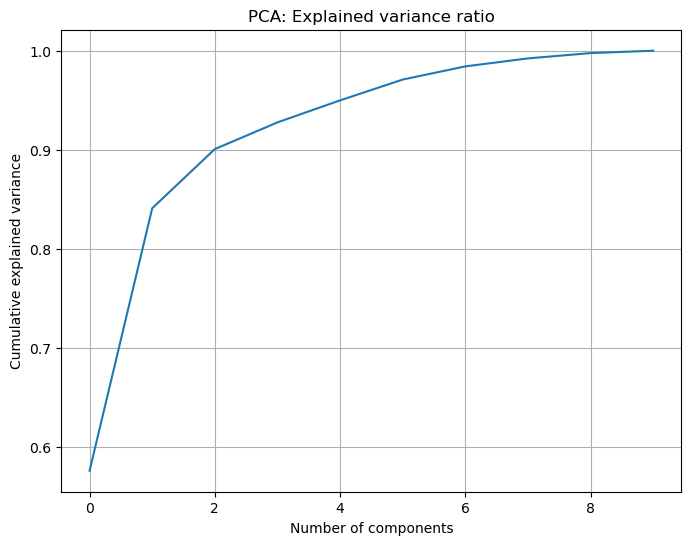

In [9]:
cars_norm = StandardScaler().fit_transform(cars.iloc[:, 2:])
pca = PCA().fit(cars_norm)
for i in range(len(pca.components_)):
    print('PCA component %d cumulative explained variance: %25.20f' % (i, np.sum(pca.explained_variance_ratio_[:i+1])))
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance') 
plt.title('PCA: Explained variance ratio')
plt.grid()
plt.show()

This code creates a side-by-side visualization to help interpret the results of Principal Component Analysis (PCA). The first line, `fig, ax = plt.subplots(1, 2, figsize=(12, 6))`, sets up a figure with two subplots arranged in one row and two columns, and specifies the overall figure size.

In the first subplot (`ax[0]`), a bar chart is drawn showing the proportion of variance explained by each of the first 10 principal components. The x-axis represents the principal component number (from 1 to 10), and the y-axis shows how much variance each component explains individually, using `pca.explained_variance_ratio_`.

In the second subplot (`ax[1]`), another bar chart is plotted, but this time it shows the cumulative sum of the explained variance ratios. This helps visualize how much total variance is captured as more principal components are included.

The axis labels are set to clarify what each subplot represents: the first shows "Proportion of explained variance" for each component, and the second shows "Proportion of retained variance" as components are accumulated. `plt.tight_layout()` adjusts the spacing to prevent overlap between subplots, and `plt.show()` displays the figure.

Overall, this visualization helps you quickly assess how many principal components are needed to capture most of the variance in the dataset, which is useful for dimensionality reduction decisions.

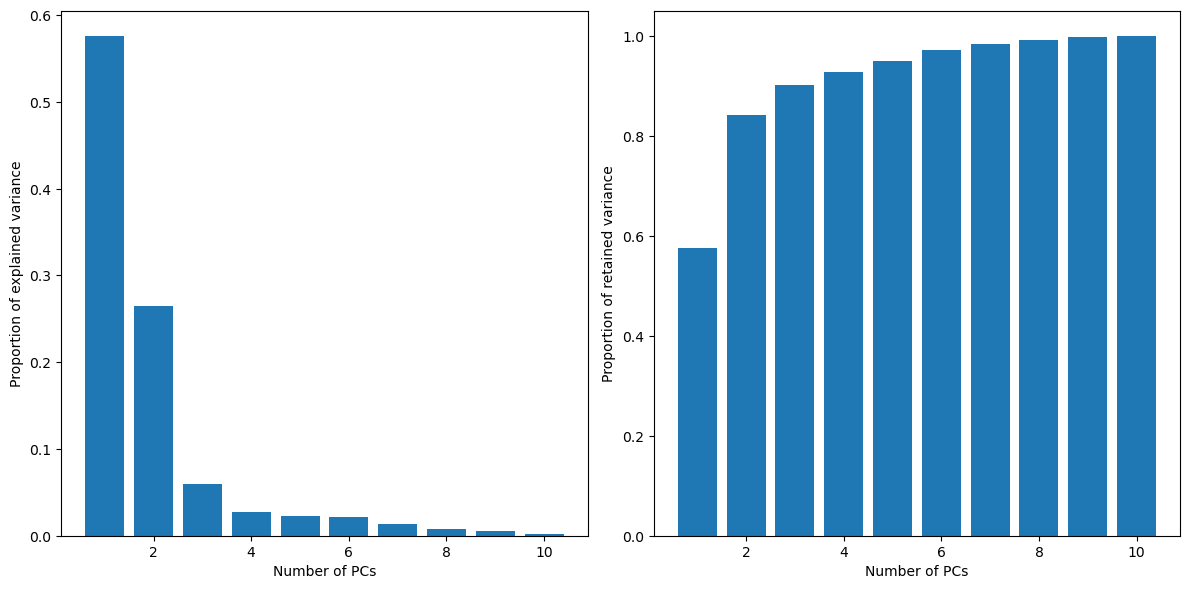

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].bar(np.arange(10) + 1, pca.explained_variance_ratio_)
ax[1].bar(np.arange(10) + 1, np.cumsum(pca.explained_variance_ratio_))
ax[0].set_xlabel('Number of PCs')
ax[0].set_ylabel('Proportion of explained variance')
ax[1].set_xlabel('Number of PCs')
ax[1].set_ylabel('Proportion of retained variance')
plt.tight_layout()
plt.show()

This code constructs a new DataFrame that combines the original target variable (`mpg`) with the first 10 principal components obtained from Principal Component Analysis (PCA), and then sets the display format for floating-point numbers.

First, `pca.transform(cars_norm)` projects the standardized feature data (`cars_norm`) onto the principal component axes, resulting in a new array where each column represents a principal component. This array is then converted into a DataFrame, with columns named `'PC1'`, `'PC2'`, ..., `'PC10'`. The column names are generated by creating a range from 1 to 10, converting it to a pandas Index, and then to strings prefixed with `'PC'`.

Next, `pd.concat([cars['mpg'], ...], axis=1)` horizontally concatenates the original `mpg` column from the `cars` DataFrame with the new principal component DataFrame. The result is a new DataFrame, `cars_pc`, where the first column is `mpg` and the remaining columns are the first 10 principal components.

The line `pd.options.display.float_format = '{:.2f}'.format` sets the display format for floating-point numbers to two decimal places, making the output easier to read when the DataFrame is displayed.

Finally, `cars_pc` is evaluated, which in a notebook environment displays the combined DataFrame. This allows you to see both the original target variable and the transformed features side by side, which is useful for further analysis or modeling using the principal components.

In [11]:
cars_pc = pd.concat([cars['mpg'],
                     pd.DataFrame(pca.transform(cars_norm), 
                                  columns='PC' + 
                     (pd.Index(range(10)) + 1).astype(str))], axis=1)
pd.options.display.float_format = '{:.2f}'.format
print(cars_pc)

     mpg   PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10
0  21.00 -0.63  1.74 -0.67  0.10 -0.93 -0.05 -0.40 -0.18  0.07  0.16
1  21.00 -0.61  1.55 -0.43  0.19 -1.03  0.16 -0.42 -0.09  0.13  0.07
2  22.80 -2.80 -0.12 -0.41 -0.26  0.45  0.51 -0.29 -0.08 -0.16 -0.18
3  21.40 -0.26 -2.36 -0.10 -0.51  0.55  0.04 -0.06 -0.19  0.10  0.17
4  18.70  2.03 -0.77 -1.02  0.08  0.20 -0.16  0.29  0.12  0.11  0.18
5  18.10 -0.20 -2.78  0.09 -1.00  0.23  0.32 -0.15 -0.05  0.15 -0.03
6  14.30  2.85  0.32 -0.32 -0.05  0.42 -0.69 -0.20  0.18 -0.36  0.20
7  24.40 -1.94 -1.45  0.96 -0.14 -0.35 -0.07  0.64 -0.37 -0.24  0.03
8  22.80 -2.30 -1.96  1.75  0.30 -0.41  0.26  0.54  0.94  0.06  0.13
9  19.20 -0.64 -0.15  1.43  0.07  0.01 -0.85  0.17 -0.54  0.26 -0.12
10 17.80 -0.71 -0.31  1.57  0.09 -0.06 -0.75  0.16 -0.34  0.34 -0.07
11 16.40  2.17 -0.70 -0.32 -0.13 -0.38 -0.19 -0.10  0.09  0.06 -0.39
12 17.30  2.01 -0.70 -0.41 -0.21 -0.35 -0.31 -0.10  0.29  0.12 -0.18
13 15.20  1.98 -0.81 -0.30 -0.18 -

This code performs a multiple linear regression analysis using the `statsmodels` library, modeling the relationship between the target variable `mpg` (miles per gallon) and the first ten principal components (`PC1` through `PC10`) derived from Principal Component Analysis (PCA). The formula `'mpg ~ PC1 + PC2 + ... + PC10'` specifies that `mpg` is the dependent variable, while the ten principal components are the independent variables (predictors). The data for the regression comes from the `cars_pc` DataFrame, which contains both the original `mpg` values and the computed principal components.

The `.fit()` method estimates the regression coefficients for each principal component by minimizing the sum of squared residuals between the observed and predicted `mpg` values. After fitting the model, `.summary()` generates a detailed statistical summary, including the estimated coefficients, their standard errors, t-statistics, p-values, R-squared value, and other diagnostic metrics. This summary helps you assess how well the principal components collectively explain the variation in `mpg` and which components are most influential in the model. Using principal components as predictors can help address issues of multicollinearity and reduce the dimensionality of the original feature set.

In [12]:
smf.ols('mpg ~ PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10', data=cars_pc).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Mon, 12 May 2025   Prob (F-statistic):           3.79e-07
Time:                        19:34:22   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.0906      0.468     42.884      0.000      19.116      21.065
PC1           -2.2454      0.195    -11.503      0.000      -2.651      -1.839
PC2            0.1145      0.288      0.398      0.695      -0.484       0.713
PC3           -1.2788      0.606     -2.109      0.047      -2.540      -0.018
PC4           -0.0886      0.902     -0.098      0.923      -1.965       1.788
PC5            0.3079      0.994      0.310      0.760      -1.759       2.375
PC6            0.3781      1.022      0.370      0.715      -1.747       2.504
PC7            0.2562      1.285      0.199      0.844      -2.416       2.929
PC8            1.0842      1.649      0.657      0.518      -2.346       4.514
PC9            1.2618      2.023      0.624      0.539      -2.944       5.468
PC10           3.4583      3.037      1.139      0.268      -2.857       9.774
==============================================================================
Omnibus:                        1.907   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.747
Skew:                           0.521   Prob(JB):                        0.418
Kurtosis:                       2.526   Cond. No.                         15.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This code fits a multiple linear regression model using the `statsmodels` library to predict the `mpg` (miles per gallon) variable based on the first three principal components (`PC1`, `PC2`, and `PC3`) from a PCA transformation. The formula `'mpg ~ PC1 + PC2 + PC3'` specifies that `mpg` is the dependent variable, while `PC1`, `PC2`, and `PC3` are the independent variables.

The `smf.ols(...).fit()` part creates and fits the Ordinary Least Squares (OLS) regression model to the data in the `cars_pc` DataFrame. The `.summary()` method then generates a detailed statistical summary of the fitted model, including the estimated coefficients for each principal component, their standard errors, t-statistics, p-values, the R-squared value, and other diagnostic metrics.

By using principal components as predictors, this approach helps address multicollinearity among the original features and reduces the dimensionality of the regression problem. The summary output allows you to assess how well these three principal components explain the variation in `mpg` and to interpret the statistical significance and effect size of each component in the model.

In [13]:
smf.ols('mpg ~ PC1 + PC2 + PC3', data=cars_pc).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     54.61
Date:                Mon, 12 May 2025   Prob (F-statistic):           8.02e-12
Time:                        19:34:22   Log-Likelihood:                -71.586
No. Observations:                  32   AIC:                             151.2
Df Residuals:                      28   BIC:                             157.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.0906      0.428     46.909      0.000      19.213      20.968
PC1           -2.2454      0.178    -12.583      0.000      -2.611      -1.880
PC2            0.1145      0.263      0.435      0.667      -0.424       0.653
PC3           -1.2788      0.554     -2.307      0.029      -2.414      -0.144
==============================================================================
Omnibus:                        1.348   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.510   Jarque-Bera (JB):                1.138
Skew:                           0.442   Prob(JB):                        0.566
Kurtosis:                       2.733   Cond. No.                         3.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This code fits a multiple linear regression model using the `statsmodels` library to predict the `mpg` (miles per gallon) variable based on just two principal components, `PC1` and `PC3`, from a PCA transformation. The formula `'mpg ~ PC1 + PC3'` specifies that `mpg` is the dependent variable, while `PC1` and `PC3` are the independent variables (predictors).

The `smf.ols(...).fit()` part creates and fits the Ordinary Least Squares (OLS) regression model to the data in the `cars_pc` DataFrame, which contains both the original `mpg` values and the principal components. The `.summary()` method then generates a detailed statistical summary of the fitted model, including the estimated coefficients for each principal component, their standard errors, t-statistics, p-values, the R-squared value, and other diagnostic metrics.

By using only selected principal components as predictors, this approach further reduces the dimensionality of the regression problem and may help focus on the most informative directions in the data. The summary output allows you to assess how well these two principal components explain the variation in `mpg` and to interpret the statistical significance and effect size of each component in the model.

In [14]:
smf.ols('mpg ~ PC1 + PC3', data=cars_pc).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     84.18
Date:                Mon, 12 May 2025   Prob (F-statistic):           8.39e-13
Time:                        19:34:22   Log-Likelihood:                -71.694
No. Observations:                  32   AIC:                             149.4
Df Residuals:                      29   BIC:                             153.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.0906      0.422     47.579      0.000      19.227      20.954
PC1           -2.2454      0.176    -12.762      0.000      -2.605      -1.886
PC3           -1.2788      0.546     -2.340      0.026      -2.396      -0.161
==============================================================================
Omnibus:                        1.232   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.540   Jarque-Bera (JB):                1.072
Skew:                           0.423   Prob(JB):                        0.585
Kurtosis:                       2.702   Cond. No.                         3.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""